<a href="https://colab.research.google.com/github/Shrahith/Generative-AI/blob/main/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

(x_train,y_train), (x_test,y_test) = datasets.fashion_mnist.load_data()
def preprocess(imgs):
  """
  Normalize and reshape the images
  """
  imgs = imgs.astype("float32") / 255.0
  imgs = np.pad(imgs, ((0, 0), (2, 2), (2, 2)), constant_values=0.0)
  imgs = np.expand_dims(imgs, -1)
  return imgs
x_train = preprocess(x_train)
x_test = preprocess(x_test)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


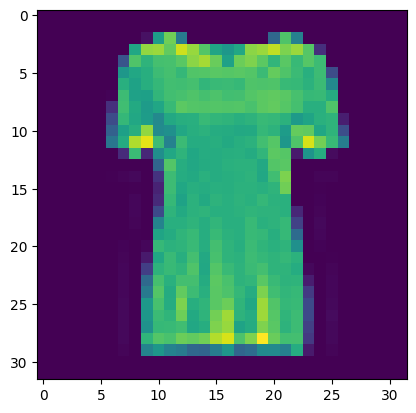

In [ ]:
x_train[0]
plt.imshow(x_train[10])

#Defining Encoder

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K


encoder_input = layers.Input(shape=(32, 32, 1), name = "encoder_input")
x = layers.Conv2D(filters=32, kernel_size=(3, 3), strides = 2, activation = 'relu', padding="same")(encoder_input)
x = layers.Conv2D(filters=64, kernel_size=(3, 3), strides = 2, activation = 'relu', padding="same")(x)
x = layers.Conv2D(filters=128, kernel_size=(3, 3), strides = 2, activation = 'relu', padding="same")(x)
shape_before_flattening = K.int_shape(x)[1:]
x = layers.Flatten()(x)
encoder_output = layers.Dense(2, name="encoder_output")(x)
encoder = models.Model(encoder_input, encoder_output)


In [ ]:
encoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)           │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 16, 16, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_output (Dense)               │ (None, 2)                   │           4,098 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96,770 (378.01 KB)

 Trainable params: 96,770 (378.01 KB)

 Non-trainable params: 0 (0.00 B)

#Defining Decoder


In [ ]:
decoder_input = layers.Input(shape=(2,), name="decoder_input")
x = layers.Dense(np.prod(shape_before_flattening))(decoder_input)
x = layers.Reshape(shape_before_flattening)(x)
x = layers.Conv2DTranspose(128, (3, 3), strides=2, activation = 'relu',padding="same")(x)
x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation = 'relu',padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation = 'relu',padding="same")(x)
decoder_output = layers.Conv2D(1, (3, 3), strides = 1, activation="sigmoid",padding="same", name="decoder_output")(x)
decoder = models.Model(decoder_input, decoder_output)
decoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)           │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │           6,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 16, 16, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_output (Conv2D)              │ (None, 32, 32, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 246,273 (962.00 KB)

 Trainable params: 246,273 (962.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder = models.Model(encoder_input, decoder(encoder_output))
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [ ]:
autoencoder.fit(
x_train,
x_train,
epochs=2,
batch_size=100,
shuffle=True,
validation_data=(x_test, x_test),
)

Epoch 1/2
600/600 ━━━━━━━━━━━━━━━━━━━━ 206s 337ms/step - loss: 0.3558 - val_loss: 0.2627
Epoch 2/2
600/600 ━━━━━━━━━━━━━━━━━━━━ 262s 338ms/step - loss: 0.2594 - val_loss: 0.2560


In [ ]:
example_images = x_test[:5000]
predictions = autoencoder.predict(example_images)
predictions.shape

157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step


(5000, 32, 32, 1)

In [ ]:
color_values=y_test[:5000]

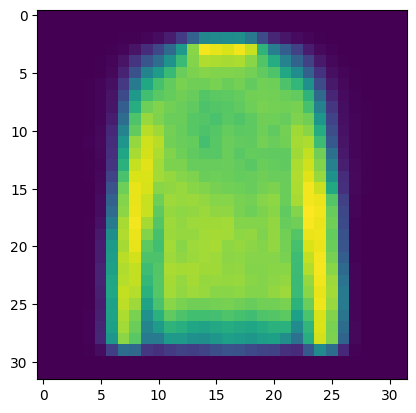

In [ ]:
plt.imshow(predictions[10])

In [ ]:
embeddings = encoder.predict(example_images)
embeddings.shape

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


(5000, 2)

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


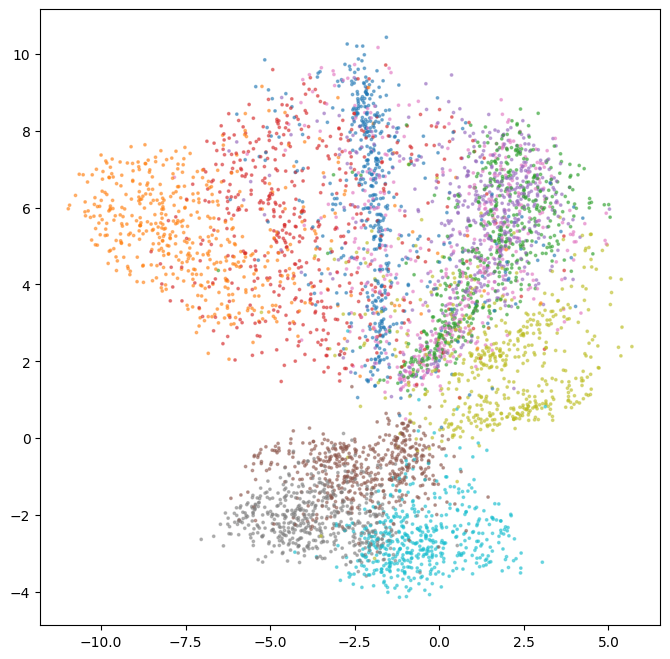

In [ ]:
embeddings = encoder.predict(example_images) #encodings to low dimensional space of example images
plt.figure(figsize=(8, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1],  c=color_values, cmap='tab10', alpha=0.5, s=3)

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step


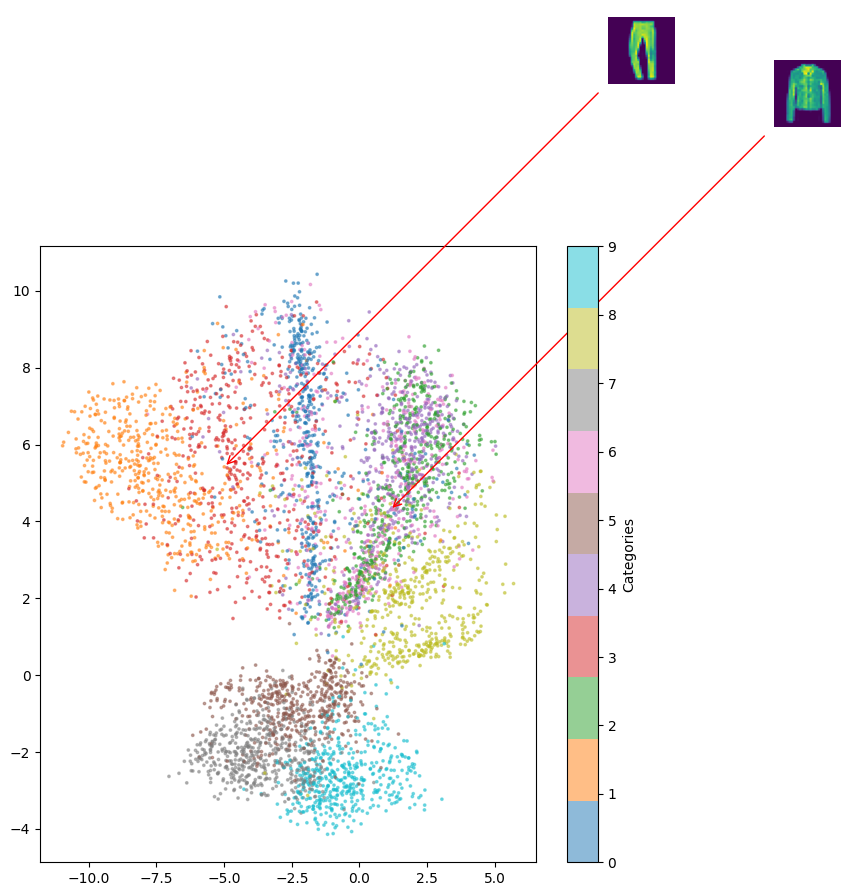

In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
embeddings = encoder.predict(example_images) #encodings to low dimensional space of example images
plt.figure(figsize=(8, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1],  c=color_values, cmap='tab10', alpha=0.5, s=3)



plt.colorbar(ticks=range(10), label='Categories')


offset=[300,300]# distance where to display the actual
for index in [5,10]:
    x0, y0 = embeddings[index]# get the 2D embedding of the selected image
    image = example_images[index]  #get the actual image from mnist dataset

    # Create an OffsetImage
    imagebox = OffsetImage(image, zoom=1.5)  # Adjust zoom as needed

    # Create an AnnotationBbox with an offset
    ab = AnnotationBbox(
        imagebox,
        (x0, y0),
        frameon=False,
        xybox=offset,
        xycoords='data',
        boxcoords="offset points",
        pad=0.5,
        arrowprops=dict(arrowstyle="->", color='red')
    )

    # Add AnnotationBbox to the plot
    plt.gca().add_artist(ab)

# Adjust plot limits to ensure there's space for the annotations
# plt.xlim(min(embeddings[:, 0]) - 1, max(embeddings[:, 0]) + 1)
# plt.ylim(min(embeddings[:, 1]) - 1, max(embeddings[:, 1]) + 1)

# Show plot
plt.show()

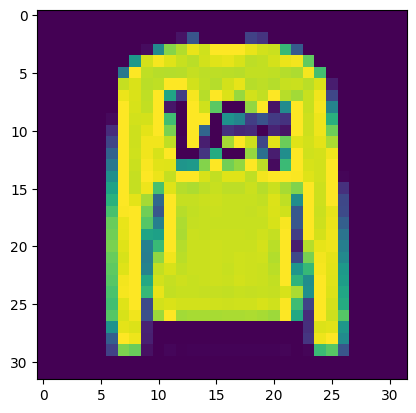

In [ ]:
# image.shape
example_images=x_test[:5000]
plt.imshow(example_images[1])


In [ ]:
x0,y0

(1.1426904, 4.299461)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


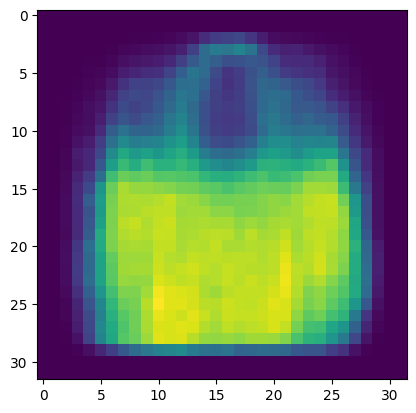

In [ ]:
mins, maxs = np.min(embeddings, axis=0), np.max(embeddings, axis=0)# getting the minimum and maximum of the embeddings for 1 dimension (row)
sample = np.random.uniform(mins, maxs, size=(1, 2)) #generating not already known random sample point from the latent space
reconstructions = decoder.predict(sample) #Decoding the not already known random sample point
plt.imshow(reconstructions[0,:,:,:])